In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from Mesh_1D import Mesh_1D
from FEM_nonlinear import FEM_nonlinear
from GL_quad import GL_Quadrature
from solvers import non_linear

[981.26117399 981.25540096 981.23808201 981.20921749 981.16880799
 981.11685434 981.05335761 980.97831911 980.89174039 980.79362322
 980.68396963 980.56278187 980.43006243 980.28581406 980.13003971
 979.9627426  979.78392617 979.59359411 979.39175032 979.17839897
 978.95354446 978.71719141 978.4693447  978.21000943 977.93919094
 977.65689482 977.36312688 977.05789319 976.74120002 976.41305392
 976.07346165 975.72243022 975.35996686 974.98607906 974.60077452
 974.20406121 973.79594731 973.37644125 972.94555169 972.50328753
 972.0496579  971.58467219 971.10834    970.62067117 970.1216758
 969.61136419 969.08974691 968.55683475 968.01263873 967.45717012
 966.89044042 966.31246136 965.72324493 965.12280333 964.511149
 963.88829463 963.25425312 962.60903764 961.95266156 961.28513852
 960.60648237 959.91670719 959.21582733 958.50385735 957.78081204
 957.04670643 956.3015558  955.54537564 954.7781817  953.99998994
 953.21081658 952.41067804 951.59959101 950.7775724  949.94463934
 949.10080921

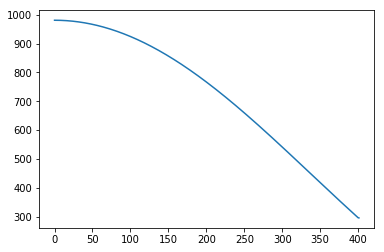

In [2]:
# create quadrature
GL=GL_Quadrature(2, False)
# create mesh: widths/subdivision/matID/srcID
mesh = Mesh_1D([0.45], [400], [0], [0],printout=False)  
# create BC
left  = {"type":"neu", "val":5.}
right = {"type":"dir", "val":300.}
bc = [left, right]
# create FEM
FE = FEM_nonlinear(GL, mesh, bc)
# pass function to non linear solver
T = np.ones(401)*300
sol = non_linear.Newton(T,FE.assemble_system,lin_solve='direct')
# plot temperature
x = np.linspace(0,401,401)
plt.plot(x,sol)
print(sol)